# Introduction :

Estimating flight prices is a useful process that can help customers get an idea about what factors affect prices of the flights they travel on and tailor their future booking accordingly. However, airlines dynamically price their tickets based on several complex influences. There is no fixed method to it.


The dataset used here is a subset of the Flight Prices dataset containing around 4 million rows, which contains information about one-way flights found on Expedia, an online travel agency, between 2022-04-16 and 2022-10-05.

To achieve our goal, we first take a preliminary look at our data, and choose relevant attributes. Then, we perform some Feature Engineering to convert our data into a useable form that can be further used for EDA and Modelling. Null values are replaced, and duplicate rows are dropped. Next, Exploratory Data Analysis (EDA) is performed to gain a better understanding of our data. Finally, we perform several versions of Linear Regression to reduce prediction error and attempt to develop an accurate model.

---

In [2]:
# Importing libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset and Performing Preliminary Analysis : 

In [3]:
df = pd.read_csv('../input/flight-price-subset/flight_prices.csv')

In [4]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,65a8a691c4d77487a439d6f44c219a39,2022-04-17,2022-04-21,LGA,DFW,UA3NA0BQ,PT5H45M,0,True,False,...,1650551340||1650563100,2022-04-21T10:29:00.000-04:00||2022-04-21T12:4...,ATL||DFW,LGA||ATL,Delta||Delta,DL||DL,Airbus A321||Airbus A321,8940||8520,762||725,coach||coach
1,1ad3c9a84f803cc98028ba8c67f35941,2022-04-18,2022-04-24,ATL,LGA,H3AHZNN1,PT2H22M,0,False,False,...,1650853920,2022-04-24T22:32:00.000-04:00,LGA,ATL,American Airlines,AA,Embraer 170,8520,762,coach
2,510f3a1255b9843a8eae48032b191faf,2022-04-17,2022-04-22,OAK,LAX,YH0OASMR,PT7H11M,0,False,False,...,1650678600||1650697140,2022-04-22T18:50:00.000-07:00||2022-04-22T23:5...,SEA||ONT,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Embraer 175||Airbus A320,7320||8940,672||956,coach||coach
3,ca0fb1ee992f752bbfdcd03a8b3e8ed0,2022-04-17,2022-05-18,LGA,SFO,MAUTA5MC,PT10H22M,0,False,False,...,1652914020||1652941920,2022-05-18T18:47:00.000-04:00||2022-05-18T23:3...,ATL||SFO,LGA||ATL,Delta||Delta,DL||DL,Airbus A321||Boeing 757-300,9420||18600,762||2135,coach||coach
4,5f7a29384cea410317ca308d2e065059,2022-04-17,2022-05-06,SFO,BOS,E0AJZNN1,PT8H29M,1,False,False,...,1651919400||1651929660,2022-05-07T06:30:00.000-04:00||2022-05-07T09:2...,JFK||BOS,SFO||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A319-321||AIRBUS INDUSTRIE A321 SHARKLETS,20280||4560,2566||185,coach||coach


In [5]:
print(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

This dataset contains 4106938 rows and 27 columns.


Some of these columns are:
- reduntant
- irrelevant for analysis
- be of incorrect datatype
- require preprocessing to extract useful information.

The above issues must be handled before we move forward.

In [6]:
df.columns

Index(['legId', 'searchDate', 'flightDate', 'startingAirport',
       'destinationAirport', 'fareBasisCode', 'travelDuration', 'elapsedDays',
       'isBasicEconomy', 'isRefundable', 'isNonStop', 'baseFare', 'totalFare',
       'seatsRemaining', 'totalTravelDistance',
       'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw',
       'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode',
       'segmentsAirlineName', 'segmentsAirlineCode',
       'segmentsEquipmentDescription', 'segmentsDurationInSeconds',
       'segmentsDistance', 'segmentsCabinCode'],
      dtype='object')

Out of these columns,
- `flightDate`, `startingAirport`, `destinationAirport`, `travelDuration`, `elapsedDays`, `isBasicEconomy`, `isRefundable`, `isNonStop`, `totalFare`, `seatsRemaining`, `totalTravelDistance`, `segmentsEquipmentDescription` and `segmentsAirlineName` are useful for analysis.

- `baseFare` and `totalFare` can be transformed to form a new column called `taxes` that provides new information.

- `searchDate` and `flightDate` can be transformed to form a new column called `daysFrom`. It tells us how many days later the flight was scheduled from the day of booking, which is an important metric that affects flight prices.


In [7]:
# Creating a new dataframe with only relevant columns :
data = df.loc[:,['flightDate', 'searchDate', 'startingAirport', 'destinationAirport','travelDuration','elapsedDays','isBasicEconomy','isRefundable','isNonStop','totalFare','seatsRemaining','totalTravelDistance','segmentsAirlineName', 'segmentsEquipmentDescription']]
data.head()

,flightDate,searchDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsEquipmentDescription
0,2022-04-21,2022-04-17,LGA,DFW,PT5H45M,0,True,False,False,142.6,9,1487.0,Delta||Delta,Airbus A321||Airbus A321
1,2022-04-24,2022-04-18,ATL,LGA,PT2H22M,0,False,False,True,498.6,1,762.0,American Airlines,Embraer 170
2,2022-04-22,2022-04-17,OAK,LAX,PT7H11M,0,False,False,False,717.0,7,1628.0,Alaska Airlines||Alaska Airlines,Embraer 175||Airbus A320
3,2022-05-18,2022-04-17,LGA,SFO,PT10H22M,0,False,False,False,497.6,9,2897.0,Delta||Delta,Airbus A321||Boeing 757-300
4,2022-05-06,2022-04-17,SFO,BOS,PT8H29M,1,False,False,False,567.6,3,2751.0,JetBlue Airways||JetBlue Airways,Airbus A319-321||AIRBUS INDUSTRIE A321 SHARKLETS


In [8]:
# Viewing 5 random rows :
data.sample(5)

,flightDate,searchDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsEquipmentDescription
2094832,2022-07-28,2022-07-16,DFW,EWR,PT6H21M,0,False,False,False,261.58,0,NaN,Spirit Airlines||Spirit Airlines,AIRBUS INDUSTRIE A320 SHARKLETS||AIRBUS INDUST...
1594975,2022-08-03,2022-06-29,OAK,SFO,PT4H5M,0,False,False,False,381.60,7,1093.0,Alaska Airlines||Alaska Airlines,Embraer 175||Boeing 737-900
829133,2022-06-27,2022-05-26,DFW,ATL,PT4H10M,0,False,False,False,482.59,4,924.0,United||United,Airbus A319||Boeing 737-700
1782362,2022-07-07,2022-07-06,BOS,JFK,PT6H29M,0,False,False,False,382.60,7,NaN,JetBlue Airways||JetBlue Airways,Airbus A320||Airbus A320
3923865,2022-11-04,2022-09-27,OAK,DFW,PT12H16M,0,False,False,False,562.70,9,2025.0,Delta||United||United,Embraer 175 (Enhanced Winglets)||Boeing 737-80...


In [9]:
# Creating taxes column :
data['taxes'] = df['totalFare'] - df['baseFare']
data['taxes'][:5]

0    31.90
1    48.37
2    71.98
3    56.67
4    61.55
Name: taxes, dtype: float64

In [10]:
# Creating daysFrom column:
data['flightDate'] = pd.to_datetime(data['flightDate'])
data['searchDate'] = pd.to_datetime(data['searchDate'])

data['daysFrom'] = (data['flightDate'] - data['searchDate']).dt.days

In [11]:
# Checking for duplicates
data.duplicated().value_counts()

False    4005447
True      101491
Name: count, dtype: int64

In [12]:
# Dropping duplicated values :
data.drop_duplicates(keep='first', inplace=True)

---
# Handling Null Values :

In [13]:
# Checking for null values :

data.isna().sum()

flightDate                           0
searchDate                           0
startingAirport                      0
destinationAirport                   0
travelDuration                       0
elapsedDays                          0
isBasicEconomy                       0
isRefundable                         0
isNonStop                            0
totalFare                            0
seatsRemaining                       0
totalTravelDistance             296912
segmentsAirlineName                  0
segmentsEquipmentDescription     75892
taxes                                0
daysFrom                             0
dtype: int64

In [14]:
# Calculating percentage of missing data :
(data.isna().sum()*data.shape[0])/100

flightDate                      0.000000e+00
searchDate                      0.000000e+00
startingAirport                 0.000000e+00
destinationAirport              0.000000e+00
travelDuration                  0.000000e+00
elapsedDays                     0.000000e+00
isBasicEconomy                  0.000000e+00
isRefundable                    0.000000e+00
isNonStop                       0.000000e+00
totalFare                       0.000000e+00
seatsRemaining                  0.000000e+00
totalTravelDistance             1.189265e+10
segmentsAirlineName             0.000000e+00
segmentsEquipmentDescription    3.039814e+09
taxes                           0.000000e+00
daysFrom                        0.000000e+00
dtype: float64

- Missing values in `totalTravelDistance` can be replaced with mean/median or replacing based on starting and destination airports.
- there is no direect way to obtain the missing values in the `segmentsEquipmentDescription` from our dataset. Instead, we can replace it with 'Unknown' or use KNN Imputation.

In [15]:
# Attempting to replace totalTravelDistance with mean/median :
distMean = data['totalTravelDistance'].mean()
distMedian = data['totalTravelDistance'].median()

In [16]:
# Adding extra columns with imputed values :
data['distMean'] = data['totalTravelDistance'].fillna(distMean)
data['distMedian'] = data['totalTravelDistance'].fillna(distMedian)

Text(0.5, 1.0, 'KDE Plot of imputed Mean and Median columns')

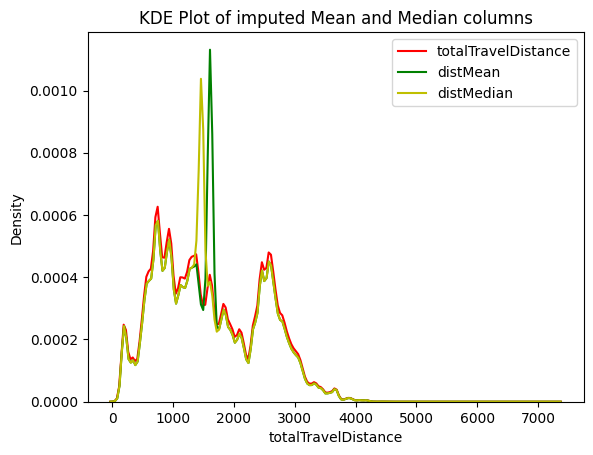

In [17]:
# Visualising using KDE plot
sns.kdeplot(data['totalTravelDistance'], label='totalTravelDistance', color='r')
sns.kdeplot(data['distMean'], label='distMean', color='g')
sns.kdeplot(data['distMedian'], label='distMedian', color='y')
plt.legend()
plt.title('KDE Plot of imputed Mean and Median columns')

Replacing null values with the mean or the median increases distribution of values at certain points in the plot. It changes the variance. Since we will be fitting a linear model to the data, such an approach is best avoided.

Text(0.5, 1.0, 'Boxplot of imputed Mean and Median columns')

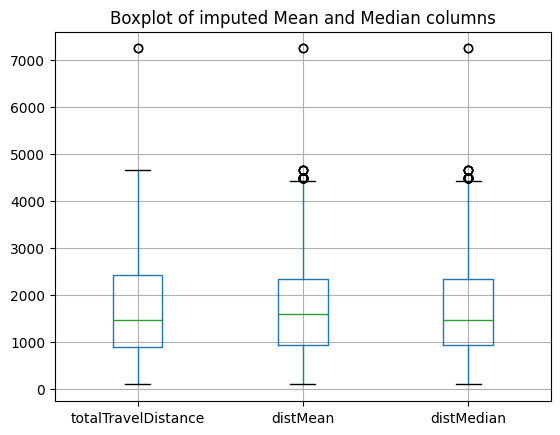

In [18]:
data.loc[:,['totalTravelDistance', 'distMean', 'distMedian']].boxplot()
plt.title('Boxplot of imputed Mean and Median columns')

Replacing with the mean or median leads to misclassification of certain values as outliers even though they do not appear as outliers in the original data. The mean also shifts.

In [19]:
# This approach is not prefered. Deleting :
del data['distMean']
del data['distMedian']

---

In [20]:
# Filling based on destination :
data['distGroup'] = data['totalTravelDistance'].fillna(data.groupby(['startingAirport','destinationAirport'])['totalTravelDistance'].transform('median'))

Text(0.5, 1.0, 'KDE Plot of imputation based on airports')

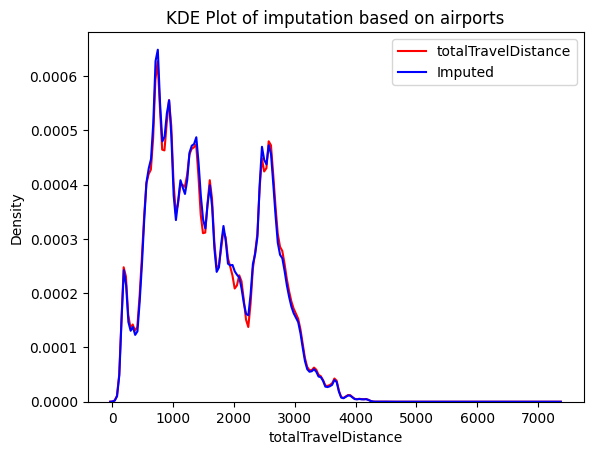

In [21]:
sns.kdeplot(data['totalTravelDistance'],label='totalTravelDistance', color='red')
sns.kdeplot(data['distGroup'],label='Imputed', color='blue')
plt.legend()
plt.title('KDE Plot of imputation based on airports')

The graphs almost completely overlap. No unnatural spikes or extreme variance is created. Hence, this approach is preferred.

<Axes: >

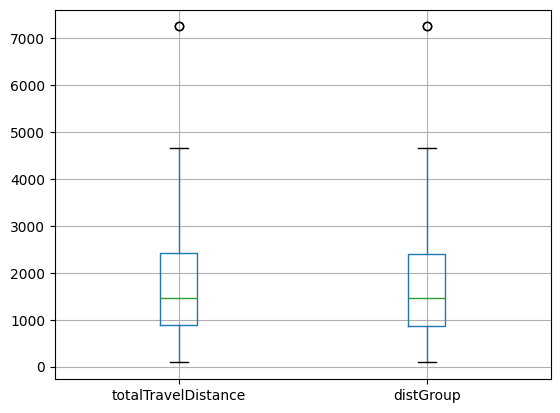

In [22]:
data[['totalTravelDistance', 'distGroup']].boxplot()

No new outliers are created, and the mean does not shift by any significant amount. This approach is hence much more preferred.

In [23]:
# replacing all nulls in segmentsEquipmentDescription with 'Missing' :
data['segmentsEquipmentDescription'] = data['segmentsEquipmentDescription'].fillna('Missing')

In [24]:
data.isna().sum()

flightDate                           0
searchDate                           0
startingAirport                      0
destinationAirport                   0
travelDuration                       0
elapsedDays                          0
isBasicEconomy                       0
isRefundable                         0
isNonStop                            0
totalFare                            0
seatsRemaining                       0
totalTravelDistance             296912
segmentsAirlineName                  0
segmentsEquipmentDescription         0
taxes                                0
daysFrom                             0
distGroup                            0
dtype: int64

---
# Converting DataTypes :


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4005447 entries, 0 to 4106937
Data columns (total 17 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   flightDate                    datetime64[ns]
 1   searchDate                    datetime64[ns]
 2   startingAirport               object        
 3   destinationAirport            object        
 4   travelDuration                object        
 5   elapsedDays                   int64         
 6   isBasicEconomy                bool          
 7   isRefundable                  bool          
 8   isNonStop                     bool          
 9   totalFare                     float64       
 10  seatsRemaining                int64         
 11  totalTravelDistance           float64       
 12  segmentsAirlineName           object        
 13  segmentsEquipmentDescription  object        
 14  taxes                         float64       
 15  daysFrom                      int64  

Here,
- `flightDate` can be converted into a datetime object to observe time-related trends more effectively.
- `segmentsAirlineName` and `segmentsEquipmentDescription` must be modified to provide useful information. They will be split into lists to replace the `||` delimiter.
- `travelDuration` is not given in a numeric format capable of analysis. It must be converted into a useable form.
- the boolean datatypes can be changed to 1/0 instead of True/False values.

In [26]:
# Modifying flightDate :
data['flightDate'] = pd.to_datetime(data['flightDate'])

In [27]:
# Extracting travel-month and travel year for EDA + seasonal trends:
data['flightMonth'] = data['flightDate'].dt.month_name()
data['flightYear'] = data['flightDate'].dt.year

In [28]:
# Modifying travelDuration :
time = pd.to_timedelta(data['travelDuration']).dt.total_seconds()
data['travelDuration'] = (time/3600).round(2) # no. of hours

In [29]:
# Modifying segmentsAirlineName and segmentsEquipmentDescription :
data['segmentsAirlineName'] = data['segmentsAirlineName'].str.strip().str.split('||',regex=False)
data['segmentsEquipmentDescription'] = data['segmentsEquipmentDescription'].str.strip().str.split('||',regex=False)

In [30]:
data['isBasicEconomy'] = data['isBasicEconomy'].astype('int')
data['isRefundable'] = data['isRefundable'].astype('int')
data['isNonStop'] = data['isNonStop'].astype('int')

In [31]:
# Viewing after transformation :
data.head()

,flightDate,searchDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,totalFare,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsEquipmentDescription,taxes,daysFrom,distGroup,flightMonth,flightYear
0,2022-04-21,2022-04-17,LGA,DFW,5.75,0,1,0,0,142.6,9,1487.0,"[Delta, Delta]","[Airbus A321, Airbus A321]",31.90,4,1487.0,April,2022
1,2022-04-24,2022-04-18,ATL,LGA,2.37,0,0,0,1,498.6,1,762.0,[American Airlines],[Embraer 170],48.37,6,762.0,April,2022
2,2022-04-22,2022-04-17,OAK,LAX,7.18,0,0,0,0,717.0,7,1628.0,"[Alaska Airlines, Alaska Airlines]","[Embraer 175, Airbus A320]",71.98,5,1628.0,April,2022
3,2022-05-18,2022-04-17,LGA,SFO,10.37,0,0,0,0,497.6,9,2897.0,"[Delta, Delta]","[Airbus A321, Boeing 757-300]",56.67,31,2897.0,May,2022
4,2022-05-06,2022-04-17,SFO,BOS,8.48,1,0,0,0,567.6,3,2751.0,"[JetBlue Airways, JetBlue Airways]","[Airbus A319-321, AIRBUS INDUSTRIE A321 SHARKL...",61.55,19,2751.0,May,2022


---
# Exploratory Data Analysis :

Text(0.5, 1.0, 'Number of flights by Month')

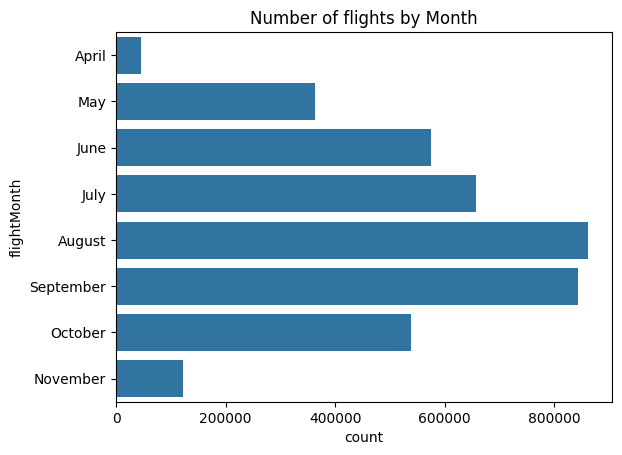

In [32]:
sns.countplot(data['flightMonth'])
plt.title('Number of flights by Month')

The vast majority of flights in this dataset occur in Summer, from June to September, with the most frequent month for travel being `August`.

Text(0, 0.5, 'Airport')

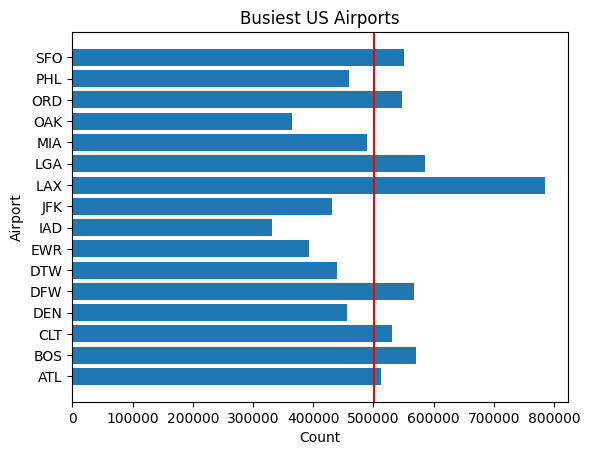

In [33]:
airportCount = (data['startingAirport'].value_counts() + data['destinationAirport'].value_counts()).reset_index()
plt.barh(airportCount['index'], airportCount['count'])
plt.axvline(np.mean(airportCount['count']), color='red')
plt.title('Busiest US Airports')
plt.xlabel('Count')
plt.ylabel('Airport')

`LAX` is by far the busiest US Airport, with around 700000 flights taking off and landing there.

Text(0.5, 1.0, 'Most frequent Airport Combinations')

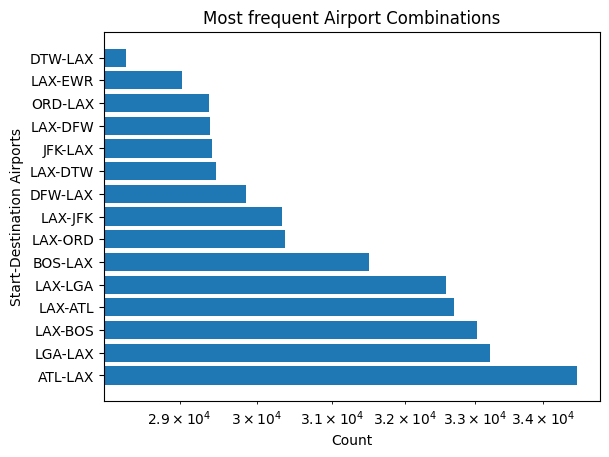

In [34]:
combo = data.loc[:,['startingAirport','destinationAirport']].value_counts()[:15].reset_index()
combo['Airport'] = combo['startingAirport']+'-'+combo['destinationAirport']
plt.barh(combo['Airport'],combo['count'], log=True)
plt.xlabel('Count')
plt.ylabel('Start-Destination Airports')
plt.title('Most frequent Airport Combinations')

`ATL to LAX` has the most number of flights, followed by `LGA to LAX`.

Text(0.5, 1.0, 'Most Popular Airlines')

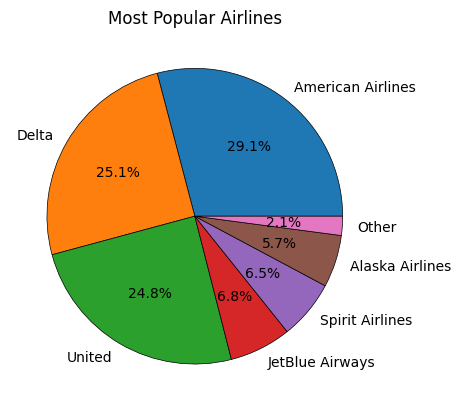

In [35]:
airlines = data['segmentsAirlineName'].explode().value_counts()
airlines_plt = airlines[:6]
airlines_plt['Other'] = airlines[6:].sum()

plt.pie(airlines_plt, 
        labels= airlines_plt.index, 
        autopct="%1.1f%%",
       wedgeprops={'linewidth': 0.5,'edgecolor': 'black'})
plt.title('Most Popular Airlines')


`American Airlines`, `Delta` and `United` have maximum number of flights.

In [36]:
planes = data['segmentsEquipmentDescription'].explode().str.title()
planes_clean = planes.str.extract(r"([A-Za-z]+)").value_counts()
planes_plts = planes_clean[:4]
planes_plts['Other'] = planes_clean[4:].sum()
planes_plts = planes_plts.reset_index()

Text(0.5, 1.0, 'Most Popular Aircraft Manufacturers')

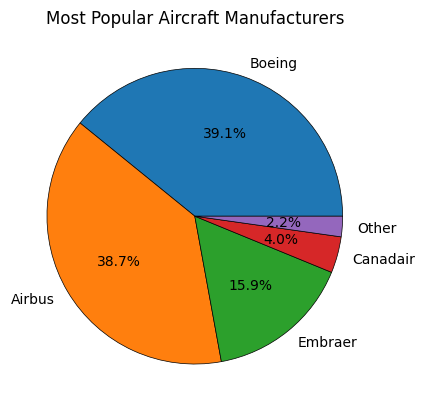

In [37]:
plt.pie(planes_plts.iloc[:,1],
        labels=planes_plts.iloc[:,0],
        autopct="%1.1f%%",
       wedgeprops= {'linewidth': 0.5, 'edgecolor': 'black'})
plt.title('Most Popular Aircraft Manufacturers')

The Pie Chart depicts the clear dominance of `Airbus` and `Boeing` as Aircraft manufacturers.

<BarContainer object of 8 artists>

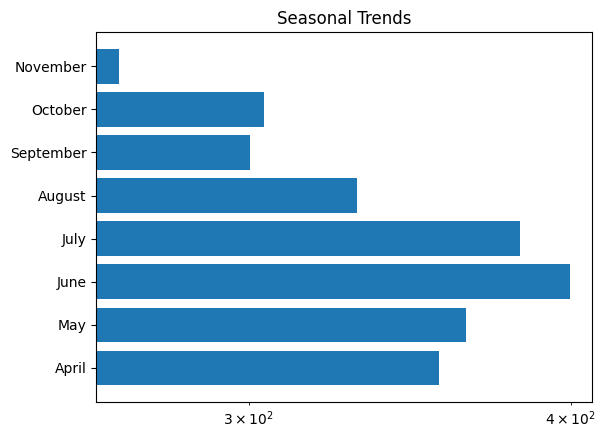

In [38]:
monthlyCost = data.groupby('flightMonth')['totalFare'].mean()
monthlyCost = monthlyCost.iloc[[0,4,3,2,1,7,6,5]]
plt.title('Seasonal Trends')
plt.barh(monthlyCost.index,monthlyCost, log=True)


On average, `June`, followed by `July` have the most expensive flights. These two months are also among the busiest.

Text(0.5, 1.0, 'Mean Duration by Takeoff Airport')

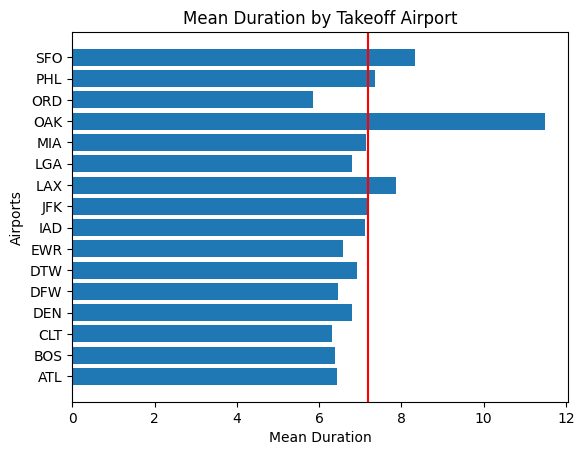

In [39]:
# What is the average travel duration of flights departing from each airport? :

airport_grps = data.groupby('startingAirport')['travelDuration'].mean()

plt.axvline(airport_grps.mean(), color='r')
plt.barh(airport_grps.index,airport_grps)
plt.ylabel('Airports')
plt.xlabel('Mean Duration')
plt.title('Mean Duration by Takeoff Airport')

Flights taking off from `OAK` and `SFO` travel the longest, followed by `LAX`.

In [40]:
test = data.iloc[:1000000,]
test['segmentsAirlineName'] = test['segmentsAirlineName'].apply(lambda x: x[0])

/tmp/ipykernel_55/1012232621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['segmentsAirlineName'] = test['segmentsAirlineName'].apply(lambda x: x[0])


Text(0.5, 1.0, 'Fare by Seat Type')

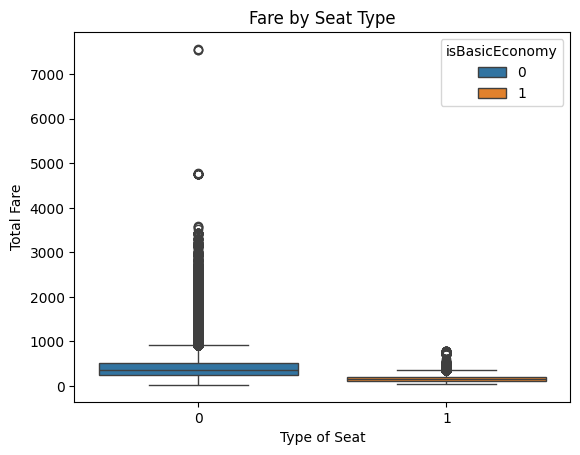

In [41]:
sns.boxplot(x='isBasicEconomy', y='totalFare', hue='isBasicEconomy', data=test)
plt.xlabel('Type of Seat')
plt.ylabel('Total Fare')
plt.title('Fare by Seat Type')

---
# Linear Regression :

In [42]:
# imprting :
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [43]:
# Selecting only Numeric and Boolean columns :
numeric_col = data.select_dtypes('number','boolean')

<Axes: >

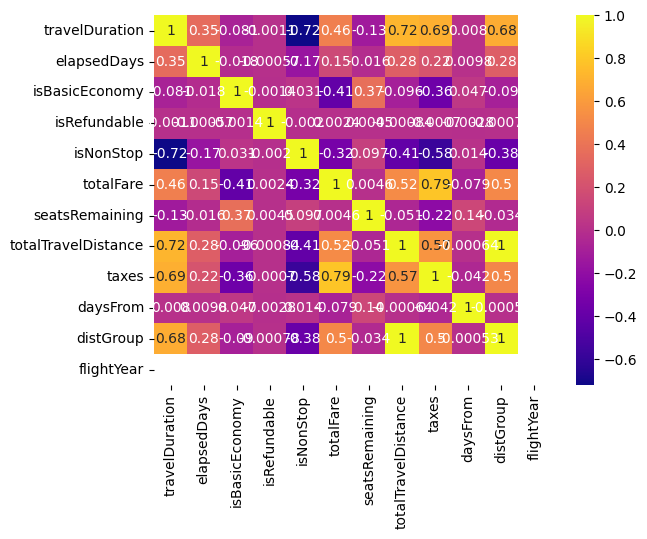

In [44]:
sns.heatmap(numeric_col.corr(method='spearman'), cmap='plasma', annot=True)

From the heatmap, `totalTravelDistance`, `travelDuration` and appear most relevant to predicting Y. Firstly, we will fit a simple linear regression and check our metrics. Then, we will fit multiple regression models, with categorical features and association terms. 

---
## Simple Linear Regression with Distance :

In [45]:
# Splitting data :
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data['distGroup'], data['totalFare'], test_size= 0.05, random_state=42)

In [46]:
ct1 = ColumnTransformer(
    transformers = [
        ('numeric',StandardScaler(), ['distGroup'])
    ] 
)

In [47]:
pipeline1 = Pipeline(
    steps = [
        ('preprocess', ct1),
        ('regressor', LinearRegression())
    ]
)

In [48]:
pipeline1.fit(X_train1.to_frame(), Y_train1.to_frame())

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['distGroup'])])),
                ('regressor', LinearRegression())])

In [49]:
Y_pred1 = pipeline1.predict(X_test1.to_frame())

Text(0.5, 0, '')

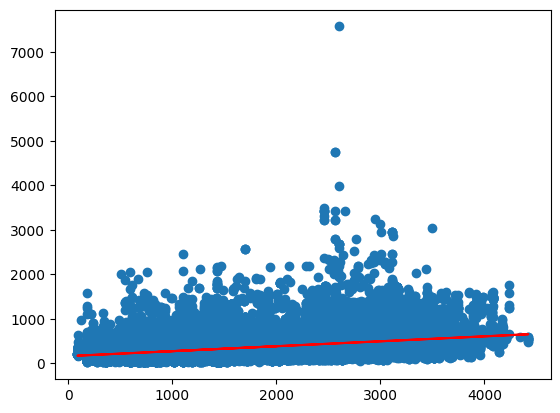

In [50]:
plt.scatter(X_test1,Y_test1)
plt.plot(X_test1,Y_pred1, 'r')
plt.xlabel('')

In [51]:
print(f"Mean Absolute Error: {mean_absolute_error(Y_test1,Y_pred1)}")
print(f"R2 Score: {r2_score(Y_test1,Y_pred1)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test1,Y_pred1)}")


Mean Absolute Error: 125.66195203297187
R2 Score: 0.23099918505091188
Mean Absolute Percentage Error: 0.5110245842210532


The R2 Score is low, meaning that only 23% of the variance is being explained by the model. MAE and MAPE are higher than desired, implying that the fit is not good.

---
## Multiple Linear Regression with Duration and Distance :

In [52]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data.loc[:,['distGroup','travelDuration']],data['totalFare'],test_size = 0.05, random_state=42)

In [53]:
ct2 = ColumnTransformer(
    transformers = [
        ('numeric', StandardScaler(), ['distGroup', 'travelDuration'])
    ]
)

In [54]:
pipeline2 = Pipeline(
    steps = [
        ('preprocess', ct2),
        ('regressor', LinearRegression())
    ]
)

In [55]:
pipeline2.fit(X_train2, Y_train2)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['distGroup',
                                                   'travelDuration'])])),
                ('regressor', LinearRegression())])

In [56]:
Y_pred2 = pipeline2.predict(X_test2)

In [57]:
print(f"Mean Absolute Error: {mean_absolute_error(Y_test2,Y_pred2)}")
print(f"R2 Score: {r2_score(Y_test2,Y_pred2)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test2,Y_pred2)}")


Mean Absolute Error: 122.98263925500524
R2 Score: 0.2509352021967879
Mean Absolute Percentage Error: 0.4984474645915147


Creating a multiple regression model with the above attributes does not significantly improve the fit. More attributes must be used. There is only a 0.02 improvement of R2 score.

---
## Multiple Linear Regression with an Association Term :

In [58]:
preprocess = Pipeline(
    steps = [
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(
            interaction_only=True,
            include_bias=False
        ))
    ]
)

In [59]:
ct3 = ColumnTransformer(
    transformers = [
        ('numeric', preprocess, ['distGroup', 'travelDuration'])
    ]
)

In [60]:
pipeline3 =  Pipeline(
    steps=[
        ('preprocess', ct3),
        ('regressor', LinearRegression())
    ]
)

In [61]:
pipeline3.fit(X_train2, Y_train2)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['distGroup',
                                                   'travelDuration'])])),
                ('regressor', LinearRegression())])

In [62]:
Y_pred3 = pipeline3.predict(X_test2)

In [63]:
print(f"Mean Absolute Error: {mean_absolute_error(Y_test2,Y_pred3)}")
print(f"R2 Score: {r2_score(Y_test2,Y_pred3)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test2,Y_pred3)}")


Mean Absolute Error: 123.00286908942446
R2 Score: 0.2513413612916867
Mean Absolute Percentage Error: 0.4993904347072057


Adding the association term does not significantly improve the fit. Meaning that better and more relevant attributes must also be used.

---
## Multiple Linear Regression with Categorical Features :

In [64]:
# Selecting columns :

data_mlr = data.loc[:,['startingAirport','destinationAirport','isBasicEconomy','isNonStop', 'travelDuration', 'distGroup', 'segmentsAirlineName','flightMonth', 'totalFare', 'daysFrom']]
data_mlr['segmentsAirlineName'] = data_mlr['segmentsAirlineName'].apply(lambda x: x[0]) # Selecting only the first airline for simplicity


In [65]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(data_mlr.drop('totalFare', axis=1),data_mlr['totalFare'], test_size = 0.05, random_state=42)

In [66]:
ct4 = ColumnTransformer(
    transformers = [
        ('numeric', StandardScaler(), ['distGroup', 'travelDuration', 'daysFrom']),
        ('categorical', OneHotEncoder(drop='first'), ['startingAirport','destinationAirport','isBasicEconomy','isNonStop', 'segmentsAirlineName','flightMonth'])
    ]
)

In [67]:
pipeline4 = Pipeline(
    steps = [
        ('preprocess', ct4),
        ('regressor', LinearRegression())
    ]
)

In [68]:
pipeline4.fit(X_train4,Y_train4)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['distGroup',
                                                   'travelDuration',
                                                   'daysFrom']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first'),
                                                  ['startingAirport',
                                                   'destinationAirport',
                                                   'isBasicEconomy',
                                                   'isNonStop',
                                                   'segmentsAirlineName',
                                                   'flightMonth'])])),
                ('regressor', LinearRegression())])

In [69]:
Y_pred4 = pipeline4.predict(X_test4)

In [70]:
print(f"Mean Absolute Error: {mean_absolute_error(Y_test4,Y_pred4)}")
print(f"R2 Score: {r2_score(Y_test4,Y_pred4)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test4,Y_pred4)}")


Mean Absolute Error: 94.28535719830657
R2 Score: 0.49186624796508094
Mean Absolute Percentage Error: 0.3442479628909712


The R2 Score has increased to 0.49, meaning that 49% of the variance is explained by the model. This is expected behaviour. MAE and MAPE have reduced, implying more accurate fit.

### Diagnostic tests with a Residual Plot :

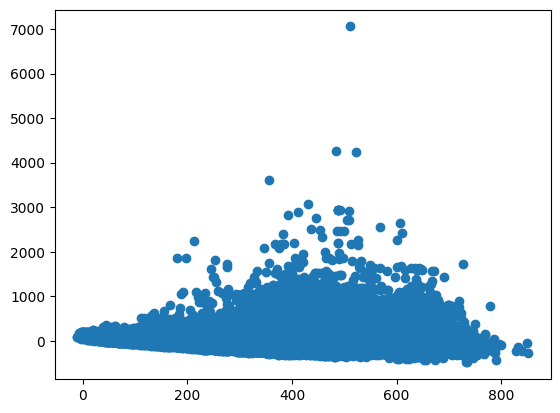

In [71]:
# Checking for heteroscedasity :
residuals = pd.Series(Y_test4 - Y_pred4)
plt.scatter(pd.Series(Y_pred4), residuals)

The above residual plot is funnel/triangular shaped, indicating the presence of heteroscedasity. Moreover, it suggests non-linearity, presence of outliers and high leverage points.

---
## Multiple Linear Regression with Transformed Y :

In [72]:
# log transform of Y :

Y_train_log = np.log1p(Y_train4)
Y_test_log = np.log1p(Y_test4)

In [73]:
pipeline4.fit(X_train4, Y_train_log)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['distGroup',
                                                   'travelDuration',
                                                   'daysFrom']),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first'),
                                                  ['startingAirport',
                                                   'destinationAirport',
                                                   'isBasicEconomy',
                                                   'isNonStop',
                                                   'segmentsAirlineName',
                                                   'flightMonth'])])),
                ('regressor', LinearRegression())])

In [74]:
Y_log_pred = pipeline4.predict(X_test4)

In [75]:
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_log,Y_log_pred)}")
print(f"R2 Score: {r2_score(Y_test_log,Y_log_pred)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test_log,Y_log_pred)}")

Mean Absolute Error: 0.2848902575971885
R2 Score: 0.6010577923770957
Mean Absolute Percentage Error: 0.05153432760014629


We see a significant improvement in the fit, implying that heteroscedasity is no longer an issue. 60% of the variance is explained by the model.

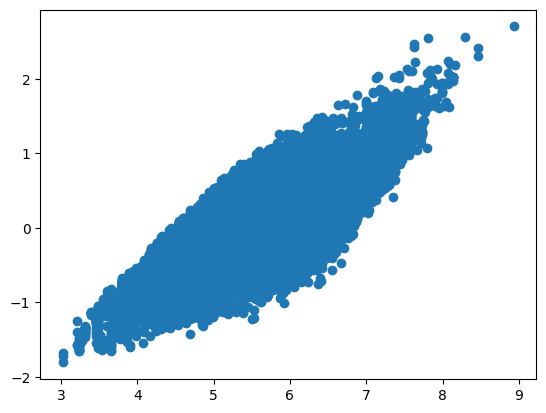

In [76]:
resid_log = Y_test_log - Y_log_pred
plt.scatter(Y_test_log,resid_log)

The above residual plot shows that heteroscedasity is no longer an issue, however, the plot still suggests non-linearity. Linear Regression is unable to perfectly capture the true relation between the variables.

----
## Adding an Association Term to the Previous Model:

In [77]:
pipeline_categorical = Pipeline(
    steps = [
        ('encoder', OneHotEncoder(drop='first')),
        ('interaction', PolynomialFeatures(interaction_only=True, include_bias=False))
    ]
    
)

In [78]:
ct5 = ColumnTransformer(
    transformers = [
        ('numeric', StandardScaler(),['distGroup', 'travelDuration', 'daysFrom']),
        ('categoric interaction', pipeline_categorical, ['startingAirport', 'destinationAirport', 'flightMonth']),
        ('categoric', OneHotEncoder(drop='first'), ['isBasicEconomy','isNonStop', 'segmentsAirlineName'])
    ]
)

Route (startingAirport and destinationAirport) and flightMonth are added as association term.

In [79]:
pipeline5 = Pipeline(
    steps = [
        ('preprocess', ct5),
        ('regressor', LinearRegression())
    ]
)

In [80]:
pipeline5.fit(X_train4, Y_train_log)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['distGroup',
                                                   'travelDuration',
                                                   'daysFrom']),
                                                 ('categoric interaction',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('interaction',
                                                                   PolynomialFeatures(include_bias=False,
                                                                                      interaction_only=True))]),
                                                  ['startingAirport',
                                                   'destinationAirport',
                                                   'flightMonth']),
                                                 ('categoric',
                                                  OneHotEncoder(drop='first'),
                                                  ['isBasicEconomy',
                                                   'isNonStop',
                                                   'segmentsAirlineName'])])),
                ('regressor', LinearRegression())])

In [81]:
Y_preds = pipeline5.predict(X_test4)

In [82]:
print(f"Mean Absolute Error: {mean_absolute_error(Y_test_log,Y_preds)}")
print(f"R2 Score: {r2_score(Y_test_log,Y_preds)}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test_log,Y_preds)}")

Mean Absolute Error: 0.2681318722715295
R2 Score: 0.6382451534256299
Mean Absolute Percentage Error: 0.048497645061450136


This model gives us the best metrics compared to our previous evaluated models. 63% of the variance is explained by the model, and the MAPE drops to 0.04. 

---
# Conclusion and Limitations :

We evaluated multiple regression models to predict  flight prices using attributes like distance, airline, month, etc. 

The initial models using only distance and duration perform poorly, and displayed severe limitations such as heteroscedasity. Introduction of categorical features through One Hot Encoding and addition of association terms to the model improved the accuracy of predictions. Flight ticket prices are very often route-specific and seasonal, as was seen in the EDA we performed, hence, merely distance or duration based models were not sufficient. The model consistently overpriced cheap flights, and underpriced expensive ones, which is a serious error.

Important variables that effect prices, such as time of departure were also not included in our model, which would have helped in improving the model. Cross-validation was not performed, making our results less reliable. 

While linear models can capture broad trends, airline pricing is complex and involves many variables, which linear models cannot easily capture. Even with our best model, the issue of non-linearity was not resolved. Tree-based models can be turned to for better predictions. 
